# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

### Откроем файл с данными и изучим общую информацию. 

In [60]:
import pandas as pd #открываем файл
try:
    data = pd.read_csv('/Users/evgeniyakoreshilova/Desktop/real_estate_data.csv', sep='\t')
except:
    data = pd.read_csv('https://code.s3.yandex.net/datasets/real_estate_data.csv', sep='\t')   

In [61]:
data.info() #выводим основную информацию

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

In [62]:
data.head(20) #выводим первые 20 строк таблицы

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


array([[<AxesSubplot:title={'center':'total_images'}>,
        <AxesSubplot:title={'center':'last_price'}>,
        <AxesSubplot:title={'center':'total_area'}>,
        <AxesSubplot:title={'center':'rooms'}>],
       [<AxesSubplot:title={'center':'ceiling_height'}>,
        <AxesSubplot:title={'center':'floors_total'}>,
        <AxesSubplot:title={'center':'living_area'}>,
        <AxesSubplot:title={'center':'floor'}>],
       [<AxesSubplot:title={'center':'kitchen_area'}>,
        <AxesSubplot:title={'center':'balcony'}>,
        <AxesSubplot:title={'center':'airports_nearest'}>,
        <AxesSubplot:title={'center':'cityCenters_nearest'}>],
       [<AxesSubplot:title={'center':'parks_around3000'}>,
        <AxesSubplot:title={'center':'parks_nearest'}>,
        <AxesSubplot:title={'center':'ponds_around3000'}>,
        <AxesSubplot:title={'center':'ponds_nearest'}>],
       [<AxesSubplot:title={'center':'days_exposition'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], d

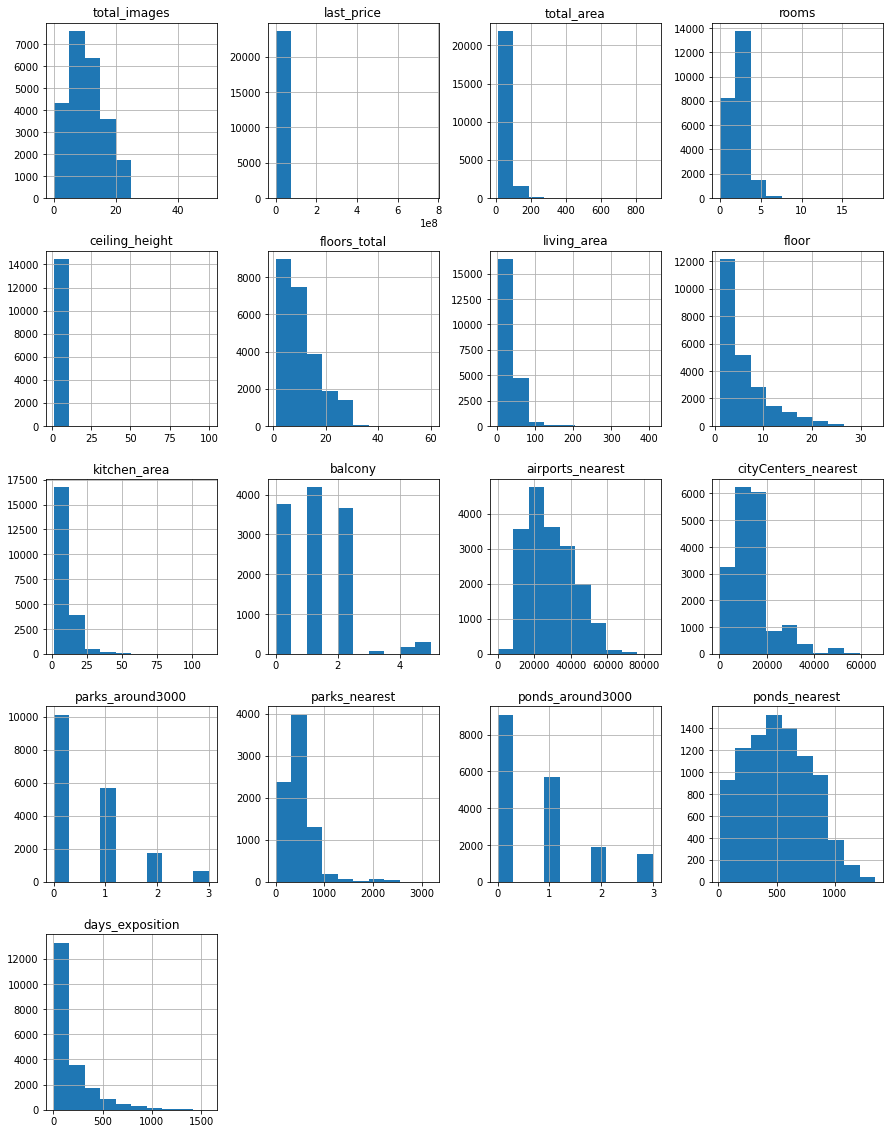

In [63]:
import matplotlib 
data.hist(figsize=(15, 20)) #строим общую гистограмму

In [64]:
data.duplicated().sum() #проверяем наличие явных дубликатов

0

### Предобработка данных

In [65]:
data.isna().sum() #определяем в каких столбцах есть пропуски

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

In [66]:
data[['balcony', 'parks_around3000', 'ponds_around3000']] = \
data[['balcony', 'parks_around3000', 'ponds_around3000']].fillna(0)

в столбцах "балконы", "парки в радиусе 3000 метров", "пруды в радиусе 3000 метров" пропуски логично заполнить нулями, раз о них нет никакой информации. Проверим так ли это. Начнем с парков

In [67]:
data[['parks_around3000', 'parks_nearest']]\
.query('parks_around3000 == 0').sort_values('parks_nearest', ascending=False)

,parks_around3000,parks_nearest
10959,0.0,3190.0
19430,0.0,3190.0
1590,0.0,3064.0
19208,0.0,3013.0
1,0.0,NaN
...,...,...
23691,0.0,NaN
23692,0.0,NaN
23695,0.0,NaN
23696,0.0,NaN


В радиусе 3000 метров парков нет либо нет информации где эти парки расположены. Нули проставлены верно. Теперь пруды.

In [68]:
data[['ponds_around3000', 'ponds_nearest']]\
.query('ponds_around3000 == 0').sort_values('ponds_nearest', ascending=False)

,ponds_around3000,ponds_nearest
1,0.0,NaN
5,0.0,NaN
6,0.0,NaN
7,0.0,NaN
8,0.0,NaN
...,...,...
23690,0.0,NaN
23692,0.0,NaN
23695,0.0,NaN
23696,0.0,NaN


In [69]:
data['ceiling_height'].sort_values().unique() #посмотрим какой разброс значений в высоте потолков

array([  1.  ,   1.2 ,   1.75,   2.  ,   2.2 ,   2.25,   2.3 ,   2.34,
         2.4 ,   2.45,   2.46,   2.47,   2.48,   2.49,   2.5 ,   2.51,
         2.52,   2.53,   2.54,   2.55,   2.56,   2.57,   2.58,   2.59,
         2.6 ,   2.61,   2.62,   2.63,   2.64,   2.65,   2.66,   2.67,
         2.68,   2.69,   2.7 ,   2.71,   2.72,   2.73,   2.74,   2.75,
         2.76,   2.77,   2.78,   2.79,   2.8 ,   2.81,   2.82,   2.83,
         2.84,   2.85,   2.86,   2.87,   2.88,   2.89,   2.9 ,   2.91,
         2.92,   2.93,   2.94,   2.95,   2.96,   2.97,   2.98,   2.99,
         3.  ,   3.01,   3.02,   3.03,   3.04,   3.05,   3.06,   3.07,
         3.08,   3.09,   3.1 ,   3.11,   3.12,   3.13,   3.14,   3.15,
         3.16,   3.17,   3.18,   3.2 ,   3.21,   3.22,   3.23,   3.24,
         3.25,   3.26,   3.27,   3.28,   3.29,   3.3 ,   3.31,   3.32,
         3.33,   3.34,   3.35,   3.36,   3.37,   3.38,   3.39,   3.4 ,
         3.42,   3.43,   3.44,   3.45,   3.46,   3.47,   3.48,   3.49,
      

Высота потолков, где значения 24, 25 метров и более - логично, что это неверно записанные значения, их нужно разделить на 10.

In [70]:
def ceiling_height(height):
    if height > 10:
        return height/10
    else:
        return height

In [71]:
data['ceiling_height'] = data['ceiling_height'].apply(ceiling_height)

<AxesSubplot:ylabel='Frequency'>

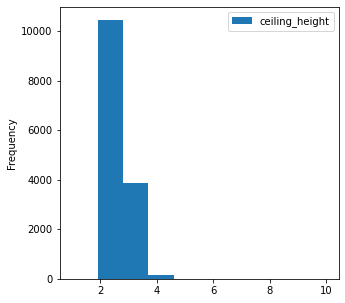

In [72]:
data.plot(y='ceiling_height', kind='hist', figsize=(5, 5))#построим гистограмму, 


Гистограмма показывает, что значения меньше 2 метров и больше 4 незначительны и их можно отбросить, чтобы они не портили картину

In [73]:
data['ceiling_height'] = data['ceiling_height'].fillna(data['ceiling_height'].median())#заполним пропущенные значения 
#в столбце "высота потолков" медианными

Посмотрим на некоторые пропуски в столбце 'days_exposition', есть ли зависимость от даты публикации

In [74]:
data[['first_day_exposition', 'days_exposition']].sort_values('days_exposition').tail(30)

,first_day_exposition,days_exposition
23499,2019-04-18T00:00:00,NaN
23501,2019-03-04T00:00:00,NaN
23502,2019-04-02T00:00:00,NaN
23512,2019-04-28T00:00:00,NaN
23521,2018-11-01T00:00:00,NaN
23524,2018-06-27T00:00:00,NaN
23532,2019-03-13T00:00:00,NaN
23533,2019-03-05T00:00:00,NaN
23535,2015-03-11T00:00:00,NaN
23547,2019-02-09T00:00:00,NaN


Какой-то явной закономерности не обнаружено. Пропуски есть в 2015, 2017-2019 годах

In [75]:
data['days_exposition'] = data['days_exposition'].fillna(data['days_exposition'].median())#заполним пропущенные 
#значения медианными, так как в этом столбце так же есть слишком высокие и слишком низкие показатели, которые могут
#повлиять на среднее значение

Переведем отдельные столбцы в числовой тип. Это целые числа и тип данных должен быть соответствующих

In [76]:
data[['balcony', 'parks_around3000', 'ponds_around3000', 'days_exposition']] = \
data[['balcony', 'parks_around3000', 'ponds_around3000', 'days_exposition']].astype('int')

Переведем дату в формат даты и времени

In [77]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')

Посмотрим сколько уникальных значений в столбце наименований

In [78]:
data['locality_name'].nunique()

364

Посмотрим есть ли там неявные дубликаты, отсортируем для удобства

In [79]:
data['locality_name'].sort_values().unique()

array(['Бокситогорск', 'Волосово', 'Волхов', 'Всеволожск', 'Выборг',
       'Высоцк', 'Гатчина', 'Зеленогорск', 'Ивангород', 'Каменногорск',
       'Кингисепп', 'Кириши', 'Кировск', 'Колпино', 'Коммунар',
       'Красное Село', 'Кронштадт', 'Кудрово', 'Лодейное Поле',
       'Ломоносов', 'Луга', 'Любань', 'Мурино', 'Никольское',
       'Новая Ладога', 'Отрадное', 'Павловск', 'Петергоф', 'Пикалёво',
       'Подпорожье', 'Приморск', 'Приозерск', 'Пушкин', 'Санкт-Петербург',
       'Светогорск', 'Сертолово', 'Сестрорецк', 'Сланцы', 'Сосновый Бор',
       'Сясьстрой', 'Тихвин', 'Тосно', 'Шлиссельбург',
       'городской поселок Большая Ижора', 'городской поселок Янино-1',
       'городской посёлок Будогощь', 'городской посёлок Виллози',
       'городской посёлок Лесогорский', 'городской посёлок Мга',
       'городской посёлок Назия', 'городской посёлок Новоселье',
       'городской посёлок Павлово', 'городской посёлок Рощино',
       'городской посёлок Свирьстрой', 'городской посёлок Совет

Поменяем сначала ё на е, чтобы основная масса дубликатов ушла

In [80]:
data['locality_name'] = data['locality_name'].replace('ё', 'е', regex=True)

In [81]:
data['locality_name'].nunique()

330

Удалим типовую принадлежность населенных пунктов, чтобы ушли остальные неявные дубликаты

In [82]:
words_del = ['городской поселок', 'деревня', 'коттеджный поселок',\
             'поселок городского типа', 'посёлок городского типа',\
             'поселок при железнодорожной станции'\
             'садовое некоммерческое товарищество', 'село', 'садовое товарищество', 'поселок',\
             'садоводческое некоммерческое товарищество', 'пок',\
             'при железнодорожной станции', 'при станции', 'станции']
name = ''
for word in words_del:
    data['locality_name'] = data['locality_name'].replace(word, name, regex=True)
data['locality_name'] = data['locality_name'].str.strip()

In [83]:
data['locality_name'].nunique()

305

В ходе предобработки данных была проведена работа по удалению дубликатов, заполнению нулями столбцов "балконы", "парки в радиусе 3 км", "пруды в радиусе 3 км". Заполнены медианой столбцы "высота потолков", "продолжительность публикации объявления". Также в столбце "высота потолков" были изменены ошибочные значения - теперь высота указана в метрах по каждой квартире. Также во многих столбцах были обнаружены аномально высокие и аномально низкие показатели, которые могут повлиять на результат исследования, разберемся с ними в следующем разделе.

### Посчитаем и добавим в таблицу новые столбцы

Добавим в таблицу новые столбцы и выведем верхние пять строчек таблицы

In [84]:
data['price_1m'] = data['last_price'] / data['total_area']
data['day_week_public'] = data['first_day_exposition'].dt.weekday
data['month_public'] = pd.DatetimeIndex(data['first_day_exposition']).month
data['year_public'] = pd.DatetimeIndex(data['first_day_exposition']).year
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_1m,day_week_public,month_public,year_public
0,20,13000000.0,108.0,2019-03-07,3,2.70,16.0,51.0,8,NaN,...,16028.0,1,482.0,2,755.0,95,120370.370370,3,3,2019
1,7,3350000.0,40.4,2018-12-04,1,2.65,11.0,18.6,1,NaN,...,18603.0,0,NaN,0,NaN,81,82920.792079,1,12,2018
2,10,5196000.0,56.0,2015-08-20,2,2.65,5.0,34.3,4,NaN,...,13933.0,1,90.0,2,574.0,558,92785.714286,3,8,2015
3,0,64900000.0,159.0,2015-07-24,3,2.65,14.0,NaN,9,NaN,...,6800.0,2,84.0,3,234.0,424,408176.100629,4,7,2015
4,2,10000000.0,100.0,2018-06-19,2,3.03,14.0,32.0,13,NaN,...,8098.0,2,112.0,1,48.0,121,100000.000000,1,6,2018


In [85]:
def floor_category(row): #Категоризируем этажность квартир на первый, последний, другой
    floor = row['floor']
    floors_total = row['floors_total']
    if floor == 1:
        return 'первый'
    elif (floor == floors_total) and (floor != 1):
        return 'последний'
    else:
        return 'другой'

In [86]:
data['floor_category'] = data.apply(floor_category, axis=1)


In [87]:
data['cityCenters_nearest_km'] = data['cityCenters_nearest']/1000
data['cityCenters_nearest_km'] = data['cityCenters_nearest_km'].round()

После добавления в таблицу всех необходимых столбцов формируем таблицу data_normal для проведения дальнейшего исследовательского анализа. В таблицу data_normal не входят выбивающие аномально высокие или низкие показатели, которые можно увидеть на гистограммах в начале проекта.

In [88]:
data_normal = data.query('ceiling_height < 4 and ceiling_height > 2.0\
and total_area < 100 and total_area > 20\
and living_area >= 10 and living_area < 70\
and kitchen_area < 25 and kitchen_area > 5\
and price_1m <= 300000\
and rooms <=6\
and floor < 20\
and floors_total < 30\
and days_exposition < 800')

Почему именно такая фильтрация:
1. высота потолков - квартиры с высотой потолков меньше 2 метров и больше 4 метров представлены незначительно. При формировании графиков эти показатели могу смазать картину.
2. общая площадь, жилая площадь, площадь кухни - также убраны показатели, которые существенно ниже и выше самых распространенных. Из-за незначительности х представления они не сыграют никакой роли при анализе, но при визулизации данных - будут представлены и могут повлиять на восприятие итогового результата.
3. цена за 1 кв метр - убираем аномально высокие показатели - свыше 300000.
4. количество комнат и этажность - также не берем высокие показатели. Они незначительны, но свое отражение в графиках найдут.
5. продолжительность продажи - берем для анализа меньше 800 дней, но помним, что есть данные и свыше 1500 дней.

### Проведем исследовательский анализ данных

count    17611.000000
mean        53.027496
std         16.786936
min         20.670000
25%         39.700000
50%         50.000000
75%         64.000000
max         99.900000
Name: total_area, dtype: float64

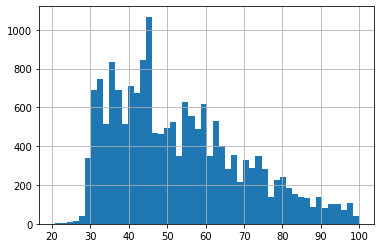

In [89]:
data_normal['total_area'].hist(bins=50)
data_normal['total_area'].describe()

Общая площадь. по графику видно, что выбивающиеся значения меньше 20 метров и больше 100 были удалены правильно. Среднее значение 53 м почти равно значению медианы - 50 м. больший объем продаж занимаю квартиры площадью от 30 до 60 м, потом количество квартир с более высоким метражом снижается. Самыми популярными в плане покупки и продажи квартир - около 45 м. Квартиры менее 30 м имеют низкую популярность.

count    17611.000000
mean        30.344263
std         12.240580
min         10.000000
25%         18.300000
50%         29.600000
75%         39.500000
max         69.800000
Name: living_area, dtype: float64

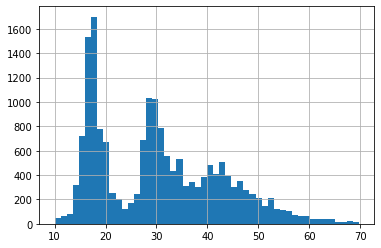

In [90]:
data_normal['living_area'].hist(bins=50)
data_normal['living_area'].describe()

Жилая площадь. Наличие двух пиков на гистограмме скорее всего связаны с количеством комнат в квартирах

count    17611.000000
mean         9.451343
std          3.218479
min          5.040000
25%          7.000000
50%          9.000000
75%         11.000000
max         24.900000
Name: kitchen_area, dtype: float64

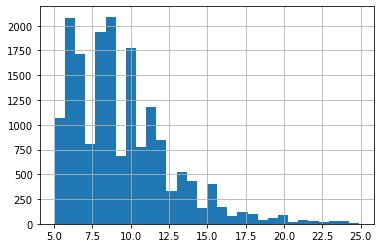

In [91]:
data_normal['kitchen_area'].hist(bins=30)
data_normal['kitchen_area'].describe()

Площадь кухни. 6 и 8 метров (пиковые значения) - именно такая площадь в большинстве продаваемых квартир, что соотносится с общей площадью в 45 метров. Среднее и медианное значение 9 метров.

count     17611.000000
mean      93924.096770
std       31839.736403
min        9615.384615
25%       75566.029571
50%       93309.859155
75%      110465.116279
max      300000.000000
Name: price_1m, dtype: float64

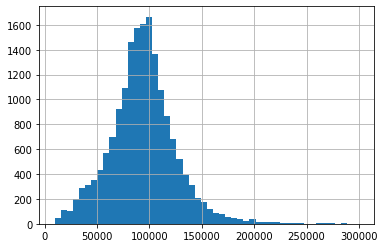

In [92]:
data_normal['price_1m'].hist(bins=50)
data_normal['price_1m'].describe()

Стоимость одного квадратного метра. Нормальное распределение с одним пиком в 100000 рублей. Выбивающиеся значение отброшены верно. Среднее и медиана почти совпадают.

count    17611.000000
mean         1.934075
std          0.853441
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max          6.000000
Name: rooms, dtype: float64

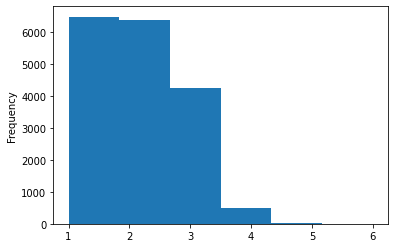

In [93]:
data_normal['rooms'].plot(kind='hist', bins=6)
data_normal['rooms'].describe()

Количество комнат. Пиковые значения - это одно- и двухкомнатные квартиры. что Похоже на общую площадь в 45 квадратных метров. Выбивающиеся значения отброшены верно. Медиана и среднее значение совпадают.


count    17611.000000
mean         2.669596
std          0.170844
min          2.250000
25%          2.580000
50%          2.650000
75%          2.700000
max          3.980000
Name: ceiling_height, dtype: float64

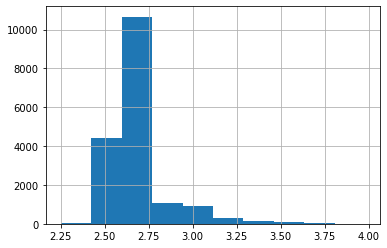

In [94]:
data_normal['ceiling_height'].hist(bins=10)
data_normal['ceiling_height'].describe()

Высота потолков. Пик от 2.50 до 2.75. Нормальное распределение, выпадающие значения отброшены верно, медиана и среднее совпадают.

count    17611.000000
mean         5.504117
std          4.126798
min          1.000000
25%          2.000000
50%          4.000000
75%          8.000000
max         19.000000
Name: floor, dtype: float64

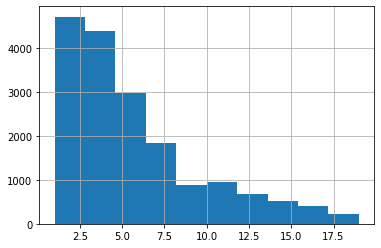

In [95]:
data_normal['floor'].hist(bins=10)
data_normal['floor'].describe()

<AxesSubplot:xlabel='floor_category'>

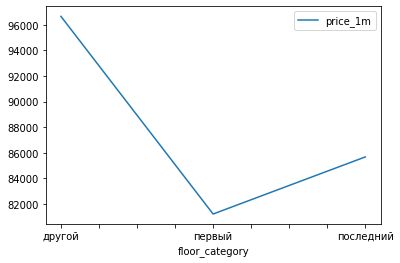

In [96]:
data_normal.pivot_table(index='floor_category', values='price_1m', aggfunc='median').plot(style='-')

По графикам видно, что самыми продаваемыми квартирами являются те, которые расположеные на этажах от 2 до 5. самыми дорогими - те, которые расположены на этажах между первым и последним. Самая низкая стоимость квартир на 1 этаже.

count    17611.000000
mean        10.424451
std          6.163945
min          1.000000
25%          5.000000
50%          9.000000
75%         14.000000
max         29.000000
Name: floors_total, dtype: float64

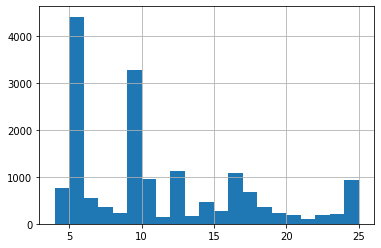

In [97]:
data_normal['floors_total'].hist(bins=21, range=(4, 25))
data_normal['floors_total'].describe()

Этажность дома. Пик - это дома в 5 и 9 этажей. Также достаточно высокие значения - 4, 10, 12, 16, 25 этажей. Аномальные значения выброшены. Распределение нормальное, медиана и среднее совпадают.

<AxesSubplot:xlabel='floors_total'>

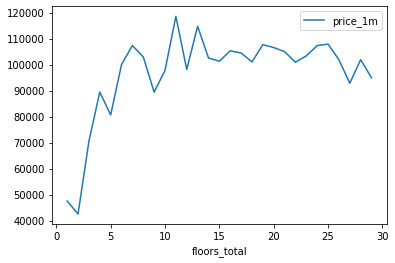

In [98]:
data_normal.pivot_table(index='floors_total', values='price_1m', aggfunc='median').plot(style='-')

<AxesSubplot:xlabel='floors_total'>

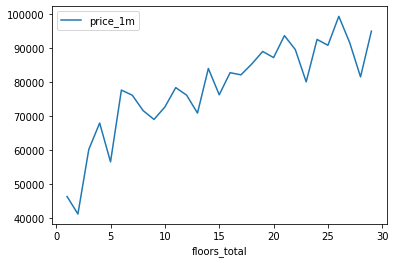

In [99]:
(
data_normal
    .query('locality_name != "Санкт-Петербург"')
    .pivot_table(index='floors_total', values='price_1m', aggfunc='median')
    .plot(style='-')
)

Стоимость 1 квадратного метра выше в квартирах, расположенных в домах 7этажных и больше. Скорее всего на данный показатель влияют квартиры в СПб. Или в высотных новостройках стоимость квартир выше чем в пятиэтажных домах. Если убрать из данных квартиры Санкт-Петербурга, картина меняется не сильно.

count    13409.000000
mean        14.829667
std          8.453028
min          0.000000
25%         11.000000
50%         13.000000
75%         16.000000
max         66.000000
Name: cityCenters_nearest_km, dtype: float64

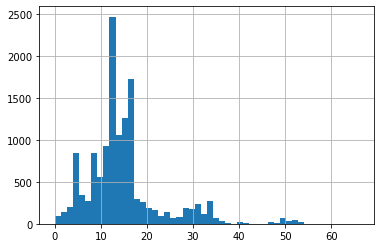

In [100]:
data_normal['cityCenters_nearest_km'].hist(bins=50)
data_normal['cityCenters_nearest_km'].describe()

Расстояние до центра. Самые популярные квартирами явлются те, которые расположены в 10-15 км от центра. затем идет резкий спад. медиана и среднее совпадают - 14 км.

count    13396.000000
mean     28914.985145
std      12875.428503
min          0.000000
25%      18038.500000
50%      27310.500000
75%      37434.000000
max      84853.000000
Name: airports_nearest, dtype: float64

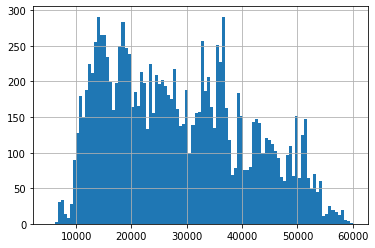

In [101]:
data_normal['airports_nearest'].hist(bins=100, range=(5000, 60000))
data_normal['airports_nearest'].describe()

Расстояние до аэропорта. Можно откинуть значения меньше 0 и больше 60 км. 15 км - пик, затем очень медленное снижение показателей. медиана и среднее совпадают.

Нижняя граница - 0, вряд ли такое существует, поэтому сдвигаем нижнюю границу к 5000 м.

count    5703.000000
mean      487.471331
std       329.177805
min         1.000000
25%       288.000000
50%       456.000000
75%       613.000000
max      3190.000000
Name: parks_nearest, dtype: float64

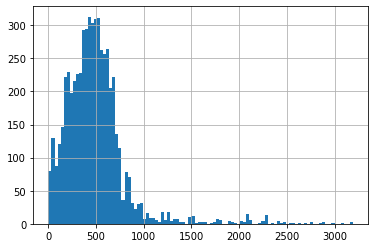

In [102]:
data_normal['parks_nearest'].hist(bins=100)
data_normal['parks_nearest'].describe()

Расстояние до ближайшего парка. Нормальное распределение от 0 до 1000 м, значения свыше 1000 метров можно откинуть.

<AxesSubplot:>

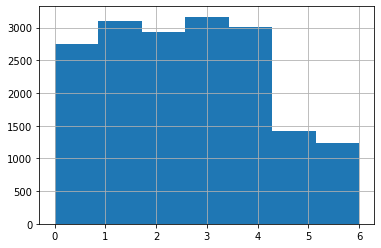

In [103]:
data_normal['day_week_public'].hist(bins=7)

День недели публикации объявления. С понедельника по пятницу объявления публиковались чаще всего. активность в выходные в два раза ниже.

<AxesSubplot:>

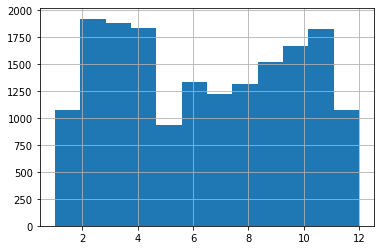

In [104]:
data_normal['month_public'].hist(bins=12, grid=True)

<AxesSubplot:xlabel='year_public'>

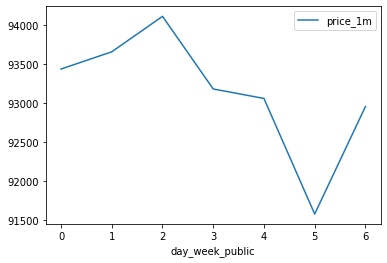

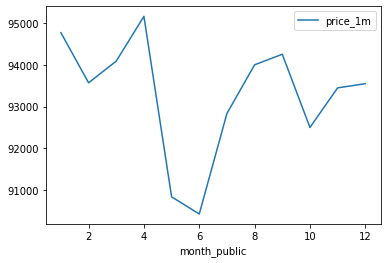

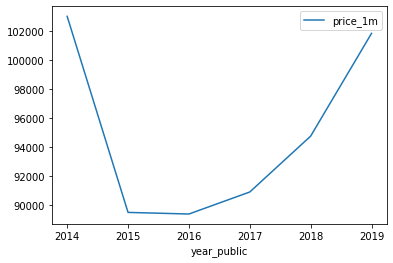

In [105]:
data_normal.pivot_table(index='day_week_public', values='price_1m', aggfunc='median').plot(style='-')
data_normal.pivot_table(index='month_public', values='price_1m', aggfunc='median').plot(style='-')
data_normal.pivot_table(index='year_public', values='price_1m', aggfunc='median').plot(style='-')

Месяц публикации объявления. Весной объявления публикуются чаще всего. Летом спад. осенью медленный рост и пик в ноябре. Стоимость одного квадратного метра также зависит от дня недели и месяца публикации объявления. Выше спрос - выше стоимость.
в 2014 году спад на спрос недвижимости и спад цен.

count    17611.000000
mean       146.447845
std        152.713651
min          1.000000
25%         45.000000
50%         95.000000
75%        184.000000
max        798.000000
Name: days_exposition, dtype: float64

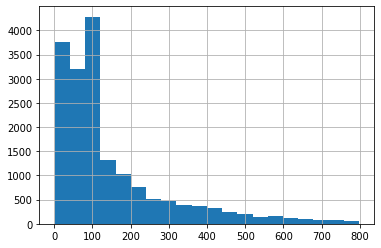

In [106]:
data_normal['days_exposition'].hist(bins=20)
data_normal['days_exposition'].describe()

<AxesSubplot:xlabel='days_exposition'>

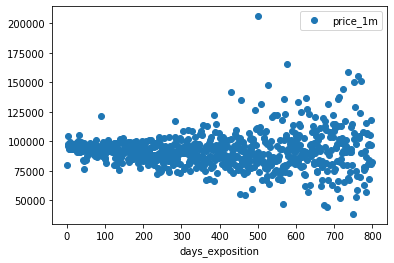

In [107]:
data_normal.pivot_table(index='days_exposition', values='price_1m', aggfunc='median').plot(style='o')

Если квартира не продается в течение 100 дней - потом идет резкий спад. Медиана и среднее не совпадают, значения удалены недостаточно, продолжительные объявления сильно влияют на средний показатель. После 400 дней продажи можно считать необычно долгими. Продажи до 45 дней - быстрые. 

In [108]:
data_normal[['last_price', 'total_area', 'living_area', 'kitchen_area',\
                                 'rooms', 'floor', 'cityCenters_nearest_km']].corr()
#посмотрим что влияет на стоимость квартиры

,last_price,total_area,living_area,kitchen_area,rooms,floor,cityCenters_nearest_km
last_price,1.000000,0.677197,0.538869,0.483880,0.391271,0.132708,-0.348588
total_area,0.677197,1.000000,0.910361,0.415401,0.797094,-0.012076,-0.145117
living_area,0.538869,0.910361,1.000000,0.120128,0.899664,-0.123345,-0.123074
kitchen_area,0.483880,0.415401,0.120128,1.000000,-0.005973,0.240488,-0.126940
rooms,0.391271,0.797094,0.899664,-0.005973,1.000000,-0.157439,-0.083343
floor,0.132708,-0.012076,-0.123345,0.240488,-0.157439,1.000000,-0.018099
cityCenters_nearest_km,-0.348588,-0.145117,-0.123074,-0.126940,-0.083343,-0.018099,1.000000


Полная стоимость зависит от общей площади( жилой площади, площади кухни), количества комнат и приближенности к центру. Этаж квартиры - незначительно влияет на стоимость.

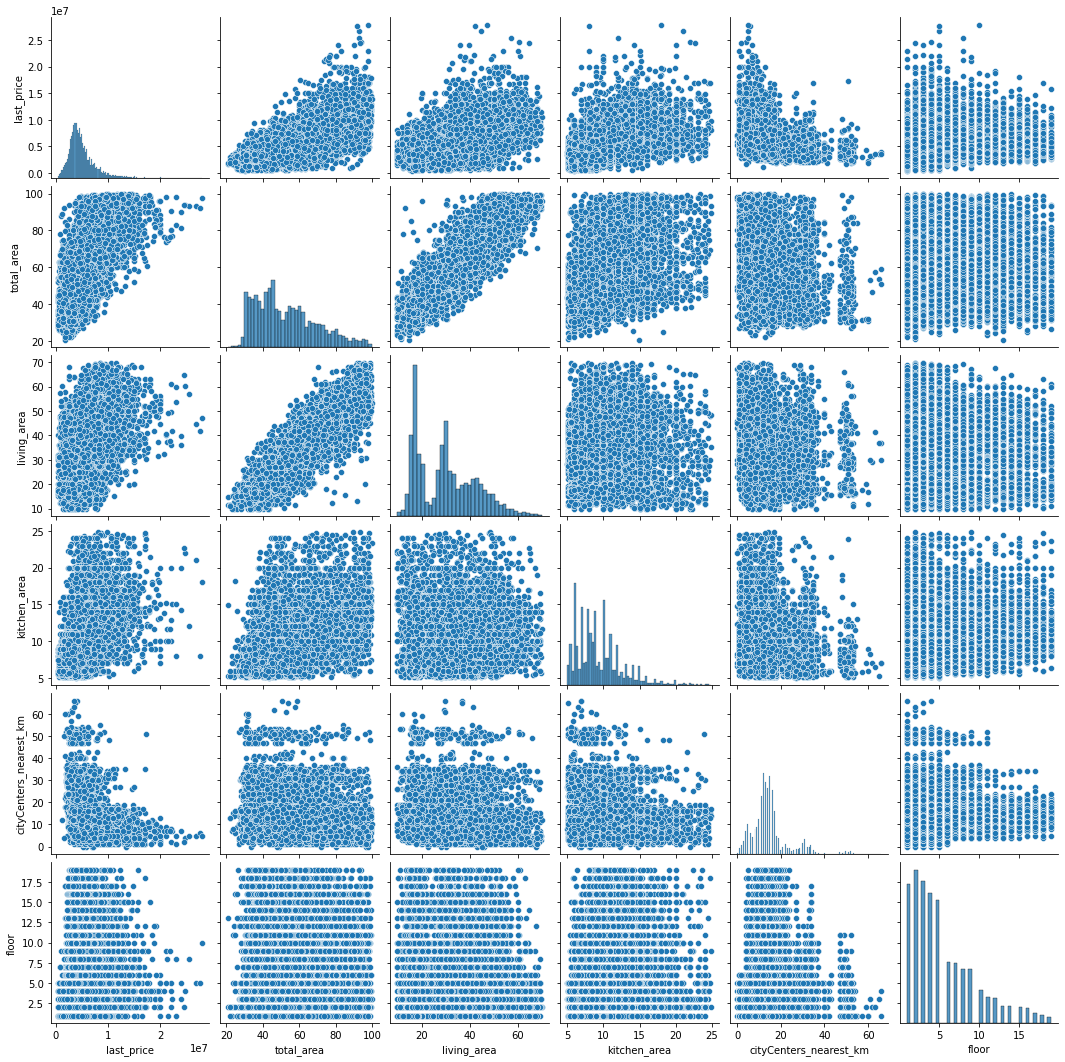

In [109]:
import seaborn as sns
sns.pairplot(data_normal[['last_price', 'total_area','living_area', 'kitchen_area',\
                          'cityCenters_nearest_km', 'floor']])

Посмотрим, как влияет количество комнат в квартире на ее стоимость.

<AxesSubplot:xlabel='rooms'>

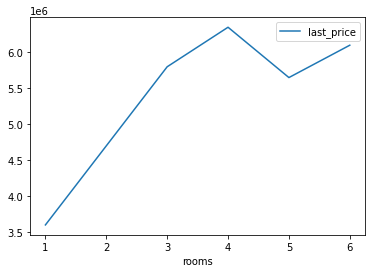

In [110]:
data_normal.pivot_table(index='rooms', values='last_price', aggfunc='median').plot(style='-')

Получается, что 4-хкомнатные квартиры дороже чем пятикомнатные и даже шестикомнатные. Вероятно, это связано с тeм, что площадь 4-хкомнатных квартир больше чем площадь квартир с пятью и шестью комнатами

Найдем 10 районов, где больше всего объявлений о продаже, и узнаем среднюю стоимость 1 квадратного метра

In [111]:
data_normal_group = data_normal[['locality_name', 'price_1m']]
data_normal_group1= data_normal_group.groupby('locality_name').mean()
data_normal_group2 = data_normal_group.groupby('locality_name').count()
data_normal_group2.columns = ['count_public']
data_normal_group_count = data_normal_group1.join(data_normal_group2).sort_values('count_public', ascending=False)
data_normal_group_count.columns = ['price_1m_mean', 'count_public']
data_normal_group_count.head(10)

,price_1m_mean,count_public
locality_name,,
Санкт-Петербург,107590.509600,11487
Мурино,85414.448635,385
Шушары,78553.563325,351
Всеволожск,67210.961931,334
Кудрово,95340.158793,333
Колпино,75277.531956,299
Пушкин,101692.335081,262
Гатчина,69315.423607,246
Парголово,89389.039387,226


Посмотрим, где располагаются самые дорогие квартиры и наоборот

In [112]:
data_normal_group_price = data_normal_group1.join(data_normal_group2).sort_values('price_1m', ascending=False)
data_normal_group_price.columns = ['price_1m_mean', 'count_public']
data_normal_group_price

,price_1m_mean,count_public
locality_name,,
Санкт-Петербург,107590.509600,11487
Зеленогорск,106839.420794,20
Сестрорецк,101911.598426,134
Пушкин,101692.335081,262
Кудрово,95340.158793,333
...,...,...
Ефимовский,12686.567164,1
Совхозный,12555.555556,1
Выскатка,12335.480902,2


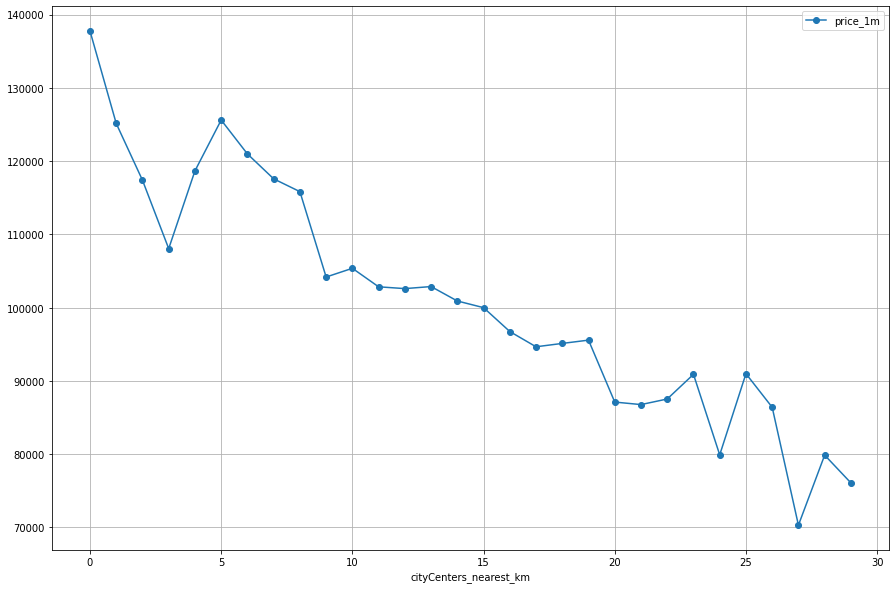

In [113]:
data_normal_spb = (
    data_normal.query('locality_name == "Санкт-Петербург"')
    .pivot_table(index='cityCenters_nearest_km', values='price_1m', aggfunc='median')
    .plot(style='-o', grid=True, figsize=(15, 10))
)


In [114]:
data_normal.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17611 entries, 1 to 23698
Data columns (total 28 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   total_images            17611 non-null  int64         
 1   last_price              17611 non-null  float64       
 2   total_area              17611 non-null  float64       
 3   first_day_exposition    17611 non-null  datetime64[ns]
 4   rooms                   17611 non-null  int64         
 5   ceiling_height          17611 non-null  float64       
 6   floors_total            17611 non-null  float64       
 7   living_area             17611 non-null  float64       
 8   floor                   17611 non-null  int64         
 9   is_apartment            2090 non-null   object        
 10  studio                  17611 non-null  bool          
 11  open_plan               17611 non-null  bool          
 12  kitchen_area            17611 non-null  float6

Зависимость между стоимостью объектов и расстояния до центра города.
Самые дорогие квартиры - в центре города. при удалении от центра - стоимость снижается. На графике наблюдаются провалы в 3 и 26-27 км
                   

### Общий вывод

В ходе анализа данных были проведены следующие действия:
    -заполнены пропущенные значения в столбцах (количество балконовБ высота потолков,число парков и прудов в радиусе 3000 м, сколько дней было размещено объявление)
    -добавлены новые столбцы (день, месяц, год публикации, категория этажа, стоимость одного квадратного метра, рсстояние до центра в км)
    -удалены строки с аномальными значениями.
    
В ходе исследования было отмечено следующее:
1) Квартиры с общей площадью от 30 до 60 м, а это одно и двухкомнатные квартиры, являются самыми востребованными на рынке недвижимости. Стоимость одного квадратного метра в таких квартирах около 100 тыс рублей. Площадь кухни составляет от 6 до 8 метров. Квартиры находятся в многоэтажном доме на этажах со второго по пятый. Расстояние до центра от 10 до 15 км. Наличие прудов, парков, удаленность аэропорта - не влияет на продажу. Такие квартиры продаются в течение 100 дней. Самыми популярными районами являются:
        - Санкт-Петербург
        - Мурино
        - Шушары
        - Всеволожск
        - Кудрово
        - Колпино
        - Пушкин
        - Гатчина
        - Парголово
        - Петергоф.
    Публикация объявления о продаже весной или в ноябре в течение рабочей недели.
2) На стоимость квартиры влияет:
        - общая площадь (чем больше площадь, тем дороже квартира)
        - близость к центру
        - расположение квартиры на этаже между первым и последним
        - этажность дома (от 7 этажей стоимость возрастает)
        - в 2014 году резкий спад стоимости недвижимости
        - дорогие квартиры продаются обычно дольше чем 100 дней. Стоимость 1 квадратного метра начинает варьроваться сильнее, чем дольше висит объявление.
        Районы с самыми дорогими квартирами:
        - Санкт-Петербург	107590.51 рублей за 1 квадратный метр
        - Зеленогорск	106839.42
        - Сестрорецк	101911.60
        - Пушкин	101692.34
        - Кудрово	95340.16
        Районы с квартирами низкой стоимости:
        - Ефимовский	12686.57 рублей за 1 квадратный метр
        - Совхозный	12555.56
        - Выскатка	12335.48
        - Ям-Тесово	12328.77
        - Старополье	10368.66